# <p style="padding:10px;background:darkblue;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Importing Libraries & Loading Modules</p>

In [1]:
!pip install nltk
!pip install datasets
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.3 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB

In [2]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import seaborn as sns

E0000 00:00:1733715845.149534      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D1209 03:44:05.157665793      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D1209 03:44:05.157679918      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D1209 03:44:05.157683128      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D1209 03:44:05.157685533      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D1209 03:44:05.157688202      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

In [3]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package wordnet to /root/nltk_data...


unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


## <p style="padding:10px;background:darkblue;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Loading Dataset</p><a id='sectiontwo-one'></a>

In [5]:
df = pd.read_csv('/kaggle/input/traindata/train3.csv')
df_test = pd.read_csv('/kaggle/input/testdata/test3.csv')

In [6]:
df.head()

,Text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
df_test.head()

,Text,category
0,highlighting issues enough modi should remain ...,NaN
1,you can fool person living delhi maybe but peo...,NaN
2,modi rallies from bjp fund and ’ totally fine ...,NaN
3,another lie hide incompetence creating employm...,NaN
4,ohh sorry kejriwal mar gaye tweeting directly ...,NaN


In [8]:
def rename(val):

    if val == -1:

        return "Negative"

    elif val == 0:

        return "Neutral"

    elif val ==1:

        return "Positive"

In [9]:
df['category'] = df['category'].apply(rename)
df = df.sample(frac=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162980 entries, 94504 to 47863
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      154281 non-null  object
 1   category  154282 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12981 entries, 0 to 12980
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Text      12978 non-null  object 
 1   category  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 203.0+ KB


In [12]:
print(df.isnull().sum())

Text        8699
category    8698
dtype: int64


In [13]:
df = df.dropna()
df.shape

(154278, 2)

In [14]:
labels = df['category']

In [15]:
labels.shape

(154278,)

## <p style="padding:10px;background:darkblue;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Exploratory Data Analysis</p><a id='sectiontwo-one'></a>

## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Visualize Class Distribution</p><a id='sectiontwo-one'></a>

/tmp/ipykernel_13/3088729348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='pastel', order=['Negative', 'Neutral', 'Positive'])


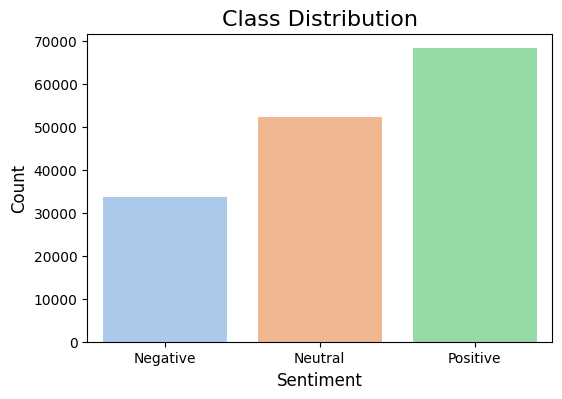

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=df, palette='pastel', order=['Negative', 'Neutral', 'Positive'])
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Wordcloud</p><a id='sectiontwo-one'></a>

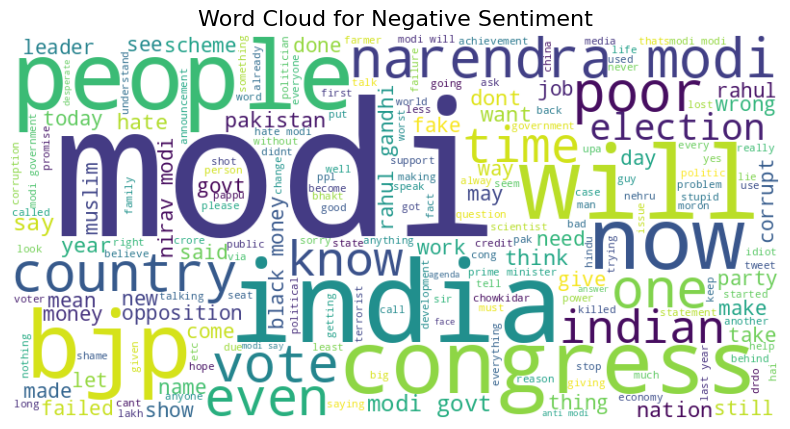

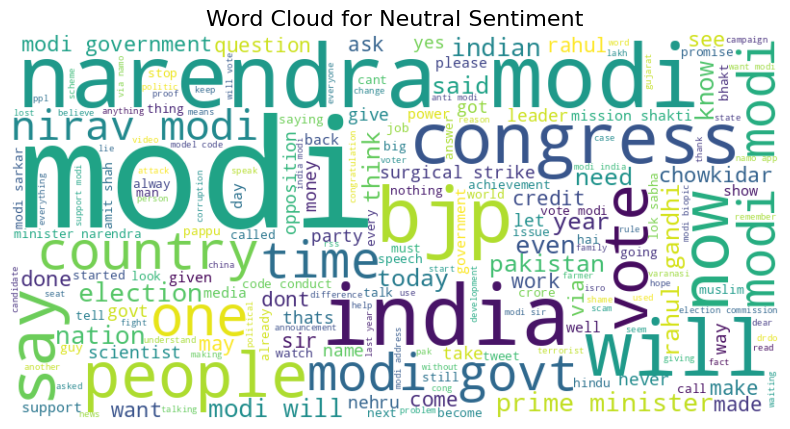

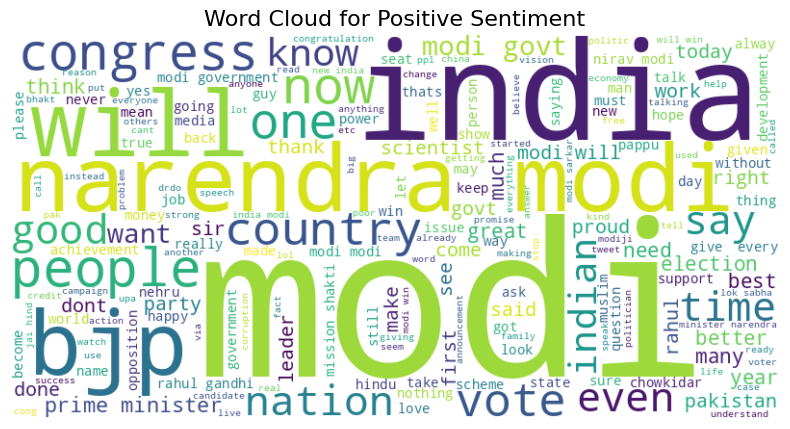

In [17]:
def generate_wordcloud(data, category_name):
    text = " ".join(data[data['category'] == category_name]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {category_name} Sentiment", fontsize=16)
    plt.axis('off')
    plt.show()


for sentiment in ['Negative', 'Neutral', 'Positive']:
    generate_wordcloud(df, sentiment)


## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Add Text Length Column</p><a id='sectiontwo-one'></a>

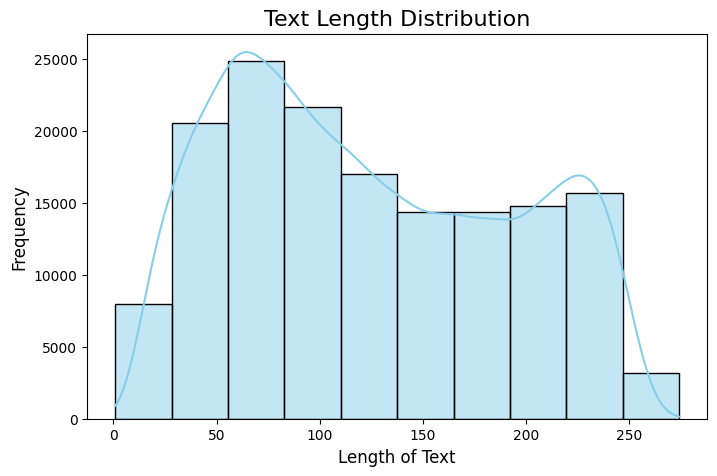

In [18]:
df['text_length'] = df['Text'].apply(len)

# Plot text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=10, kde=True, color='skyblue')
plt.title('Text Length Distribution', fontsize=16)
plt.xlabel('Length of Text', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## <p style="padding:10px;background:darkblue;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Data Preprocessing</p><a id='sectiontwo-one'></a>

In [19]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Clean Text</p><a id='sectiontwo-one'></a>

In [20]:
import re
import string
from nltk.stem import WordNetLemmatizer

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',str(text))

def word_abbrev(word):

    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
    
def replace_abbrev(text):

    string = ""

    for word in text.split():

        string += word_abbrev(word) + " "        

    return string

# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text


# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)


# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)



# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)


# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)


# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)


# Factorize elongated words, add ELONG
def remove_elongated_words(text):
    rep = re.compile(r'\b(\S*?)([a-z])\2{2,}\b')
    return rep.sub(r'\1\2 ELONG', text)


# Factorize repeated punctuation, add REPEAT
def remove_repeat_punct(text):
    rep = re.compile(r'([!?.]){2,}')
    return rep.sub(r'\1 REPEAT', text)



# Remove all punctuations
def remove_all_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)


# Remove punctuations
def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    if '...' not in text:
        text = text.replace('..', ' ... ')
    return text


# Remove all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

def stemming(text):
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text


In [21]:
 def clean_text(text):

    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)

    # Lower text, replace abbreviations
    text = replace_abbrev(text)
    text = remove_mention(text)
    text = remove_number(text)

    # Remove  smileys

    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)

    # Remove repeated puntuations / words
    text = remove_elongated_words(text)
    text = remove_repeat_punct(text)

    text = remove_all_punct(text)
    text = remove_punct(text)
    text = lemmatization(text)
    text = text.lower()

    return text

In [22]:
df["Text"] = df["Text"].apply(clean_text)
df_test["Text"] = df_test["Text"].apply(clean_text)

In [23]:
g=[]
for i in df['Text']:
    g.append(i)

In [24]:
maxl = max([len(s) for s in g])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 297


In [25]:
maxl = 3000
texts = df['Text'].values
text_test = df['Text'].values

## <p style="padding:10px;background:darkblue;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Feature Engineering</p><a id='sectiontwo-one'></a>

## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">TF-IDF Features</p><a id='sectiontwo-one'></a>

In [26]:
# TF-IDF Vectorizer for training data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_features = tfidf_vectorizer.fit_transform(texts).toarray()

print("TF-IDF Features Shape:", tfidf_features.shape)

TF-IDF Features Shape: (154278, 10000)


In [27]:
# TF-IDF Vectorizer for test data
tfidf_vectorizer_test = TfidfVectorizer(max_features=10000)
tfidf_features_test = tfidf_vectorizer_test.fit_transform(text_test).toarray()

print("TF-IDF Features Shape:", tfidf_features_test.shape)

TF-IDF Features Shape: (154278, 10000)


## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">LSTM Tokenizer</p><a id='sectiontwo-one'></a>

In [28]:
# Tokenize training data
tokenizer_lstm = tf.keras.preprocessing.text.Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer_lstm.fit_on_texts(texts)
sequences = tokenizer_lstm.texts_to_sequences(texts)

max_len = maxl
padded_sequences = pad_sequences(sequences, maxlen=max_len)

print("LSTM Features Shape (Training):", padded_sequences.shape)

LSTM Features Shape (Training): (154278, 3000)


In [29]:
# Tokenize test Data for LSTM
tokenizer_lstm_test = tf.keras.preprocessing.text.Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer_lstm_test.fit_on_texts(text_test)
sequences_test = tokenizer_lstm_test.texts_to_sequences(text_test)

max_len_test = maxl
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_len_test)

print("LSTM Features Shape:", padded_sequences_test.shape)

LSTM Features Shape: (154278, 3000)


In [30]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y = lb.fit_transform(df['category'])
print("Encoded Labels Shape:", Y.shape)

Encoded Labels Shape: (154278, 3)


## <p style="padding:10px;background:darkblue;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Model Training</p><a id='sectiontwo-one'></a>

## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Test-Train Split</p><a id='sectiontwo-one'></a>

In [31]:
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, Y, test_size=0.15, random_state=42
)

In [32]:
print("Training Shape:", X_train.shape)
print("Validation Shape:", X_val.shape)

Training Shape: (131136, 3000)
Validation Shape: (23142, 3000)


## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Model Training</p><a id='sectiontwo-one'></a>

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:75%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Naive Bayes</p><a id='sectiontwo-one'></a>

In [33]:
nb_model = MultinomialNB()
nb_model.fit(tfidf_features, labels)

MultinomialNB()

## <p style="padding:10px;background:green;margin:10;color:white;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Evaluation</p><a id='sectiontwo-one'></a>

In [34]:
y_pred_nb = nb_model.predict(tfidf_features_test)
print("Naive Bayes Classification Report:")
print(classification_report(labels, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.45      0.60     33732
     Neutral       0.86      0.67      0.75     52318
    Positive       0.67      0.94      0.78     68228

    accuracy                           0.74    154278
   macro avg       0.81      0.69      0.71    154278
weighted avg       0.79      0.74      0.73    154278



## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">LSTM Training</p><a id='sectiontwo-one'></a>

In [35]:
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    print("TPU initialized successfully")
    tpu_strategy = tf.distribute.TPUStrategy(resolver)
except Exception as e:
    print(f"Failed to initialize TPU, falling back to CPU/GPU: {e}")
    tpu_strategy = tf.distribute.get_strategy()

# Build and compile the model
with tpu_strategy.scope():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(1000, 100, input_length=maxl))
    model.add(tf.keras.layers.SpatialDropout1D(0.2))
    model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1733715953.646524      13 service.cc:145] XLA service 0x58cc20ac2690 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733715953.646597      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1733715953.646602      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1733715953.646605      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1733715953.646614      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1733715953.646616      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1733715953.646619      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1733715953.646621      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1733715953.646624      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.
TPU initialized successfully
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task

/usr/local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1733715957.967730      13 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=20 * tpu_strategy.num_replicas_in_sync,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]
)


Epoch 1/5


2024-12-09 03:46:06.831160: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1733715967.111350     985 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(15330540c5a47e32:0:0), session_name()
I0000 00:00:1733715972.624959     985 tpu_compile_op_common.cc:245] Compilation of 15330540c5a47e32:0:0 with session name  took 5.513545317s and succeeded
I0000 00:00:1733715972.645483     985 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(15330540c5a47e32:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_18132171789973064704", property.function_library_fingerprint = 15750547259897837433, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z 

819/820 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6753 - loss: 0.7456

I0000 00:00:1733716876.170432     960 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(448007f3eb0a4b3e:0:0), session_name()
I0000 00:00:1733716881.143495     960 tpu_compile_op_common.cc:245] Compilation of 448007f3eb0a4b3e:0:0 with session name  took 4.973025095s and succeeded
I0000 00:00:1733716881.164517     960 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(448007f3eb0a4b3e:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_18132171789973064704", property.function_library_fingerprint = 15750547259897837433, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "12,3000,;12,3,;", property.guaranteed_constants_size = 0, embeddi

820/820 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6754 - loss: 0.7454

2024-12-09 04:01:24.228247: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
I0000 00:00:1733716884.437482     993 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(8d955ef9774e1f3b:0:0), session_name()
I0000 00:00:1733716885.071799     993 tpu_compile_op_common.cc:245] Compilation of 8d955ef9774e1f3b:0:0 with session name  took 634.26811ms and succeeded
I0000 00:00:1733716885.074958     993 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(8d955ef9774e1f3b:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_8249321984788109592", property.function_library_fingerprint = 4399861412698670336, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, top

820/820 ━━━━━━━━━━━━━━━━━━━━ 927s 1s/step - accuracy: 0.6755 - loss: 0.7452 - val_accuracy: 0.8254 - val_loss: 0.4979
Epoch 2/5


I0000 00:00:1733716891.920495     988 tpu_compile_op_common.cc:245] Compilation of 3ffcebdceb7d3423:0:0 with session name  took 524.237877ms and succeeded
I0000 00:00:1733716891.923950     988 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(3ffcebdceb7d3423:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_8249321984788109592", property.function_library_fingerprint = 4399861412698670336, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "13,3000,;13,3,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1733716891.923979     988 tpu_compilation_cache_interface.cc:541] After adding entry for key 3ffce

820/820 ━━━━━━━━━━━━━━━━━━━━ 912s 1s/step - accuracy: 0.8272 - loss: 0.4912 - val_accuracy: 0.8292 - val_loss: 0.4824
Epoch 3/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 912s 1s/step - accuracy: 0.8279 - loss: 0.4760 - val_accuracy: 0.8310 - val_loss: 0.4785
Epoch 4/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 912s 1s/step - accuracy: 0.8268 - loss: 0.4820 - val_accuracy: 0.8372 - val_loss: 0.4647
Epoch 5/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 913s 1s/step - accuracy: 0.8392 - loss: 0.4501 - val_accuracy: 0.8365 - val_loss: 0.4566


In [38]:
try:
    model.export("saved_model_lstm")
    print("Model exported successfully as a SavedModel.")
except Exception as e:
    print(f"Failed to export the model: {e}")

Failed to export the model: Device /job:localhost/replica:0/task:0/device:CPU:0 is not found


## <p style="padding:10px;background:green;margin:10;color:white;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Evaluation</p><a id='sectiontwo-one'></a>

In [39]:
y_pred_probs = model.predict(padded_sequences_test, batch_size=32)  
y_pred = y_pred_probs.argmax(axis=1)  

predictions = pd.DataFrame({
    "text": text_test,  
    "predicted_label": [lb.classes_[label] for label in y_pred]  
})

predictions.to_csv("test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")

print("Prediction Summary:")
print(predictions['predicted_label'].value_counts())


2024-12-09 05:02:26.935116: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node sequential_1/dense_1/Add/ReadVariableOp.
I0000 00:00:1733720546.981168     954 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(53cc93327e368027:0:0), session_name()


   5/4822 ━━━━━━━━━━━━━━━━━━━━ 3:16 41ms/step

I0000 00:00:1733720547.339739     954 tpu_compile_op_common.cc:245] Compilation of 53cc93327e368027:0:0 with session name  took 358.512873ms and succeeded
I0000 00:00:1733720547.341338     954 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(53cc93327e368027:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_16809882658311077567", property.function_library_fingerprint = 14562280341636848996, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1733720547.341366     954 tpu_compilation_cache_interface.cc:541] After adding entry for key 53cc93327e

4820/4822 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

2024-12-09 05:05:41.844074: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node sequential_1/dense_1/Add/ReadVariableOp.
I0000 00:00:1733720741.947262     950 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(cdfe2f5c06b13037:0:0), session_name()


4822/4822 ━━━━━━━━━━━━━━━━━━━━ 196s 40ms/step


I0000 00:00:1733720742.292117     950 tpu_compile_op_common.cc:245] Compilation of cdfe2f5c06b13037:0:0 with session name  took 344.820345ms and succeeded
I0000 00:00:1733720742.293392     950 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(cdfe2f5c06b13037:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_8930399587866919954", property.function_library_fingerprint = 4607302020202576352, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,3000,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1733720742.293414     950 tpu_compilation_cache_interface.cc:541] After adding entry for key cdfe

Predictions saved to test_predictions.csv
Prediction Summary:
predicted_label
Positive    64390
Neutral     63785
Negative    26103
Name: count, dtype: int64


## <p style="padding:10px;background:darkblue;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Classification Report</p><a id='sectiontwo-one'></a>

In [43]:
print(classification_report(Y.argmax(axis=1), y_pred, target_names=['Neutral', 'Positive', 'Negative']))

              precision    recall  f1-score   support

     Neutral       0.86      0.66      0.75     33732
    Positive       0.77      0.94      0.85     52318
    Negative       0.90      0.85      0.87     68228

    accuracy                           0.84    154278
   macro avg       0.84      0.82      0.82    154278
weighted avg       0.85      0.84      0.84    154278



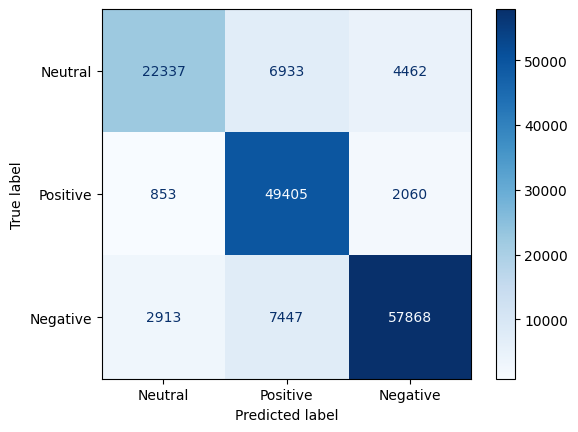

In [45]:
cm = confusion_matrix(Y.argmax(axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral', 'Positive', 'Negative'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## <p style="padding:10px;background:skyblue;margin:10;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">ROC-AOC Curve</p><a id='sectiontwo-one'></a>

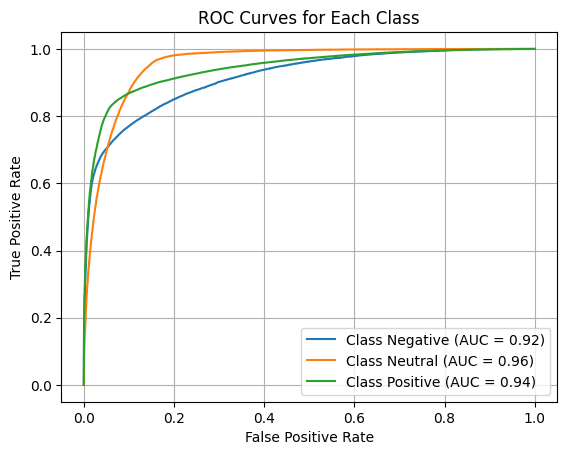

In [49]:
from sklearn.metrics import roc_curve, auc
y_val_pred_probs = y_pred_probs

plt.figure()
for i, class_label in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(Y[:, i], y_val_pred_probs[:, i])  
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.title("ROC Curves for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()